<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Iván Andrés Arellano Ruelas y Jose Alberto Mayagoitia Gutierrez.

**Fecha:** 21 de octubre del 2021.

**Expediente** : 714383 y 720266.
    
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/IvanArellanoRuelas/SPF_Tarea7_IArellano_JMayagoitia

# Tarea 8: Clase 22

# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
from datetime import datetime, date
from math import log, sqrt, pi, exp
from scipy.stats import norm
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

# Código Iván

Put para el 21 de Enero del 2022

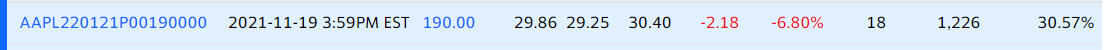

In [3]:
# Código Iván 

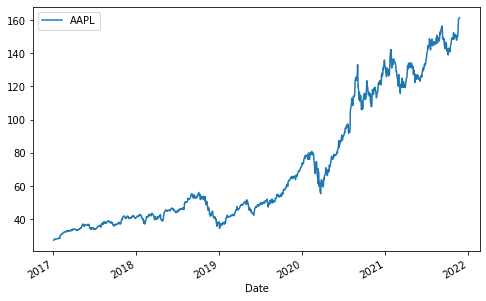

In [4]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [5]:
closes_aapl.iloc[-1]

Symbols
AAPL    161.41
Name: 2021-11-23 00:00:00, dtype: float64

In [6]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

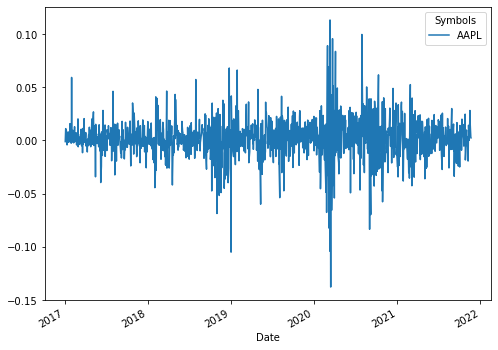

In [7]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [8]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2021-11-17,0.016
2021-11-18,0.029
2021-11-19,0.017


In [9]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-01-21'

nscen = 10000
dates = pd.date_range(start=today, end=expiry, freq='B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06', '2021-12-07', '2021-12-08',
                '2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14',
                '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
                '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
                '2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
                '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
                '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-17',
                '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21'],
               dtype='datetime64[ns]', freq='B'),
 44)

In [10]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,9997,9998,9999
2021-11-23,1.846e-02,1.183e-02,6.191e-03,...,-1.620e-02,-3.892e-03,-8.524e-03
2021-11-24,-1.348e-04,2.577e-04,6.614e-05,...,4.618e-04,4.610e-05,-2.392e-04
2021-11-25,-2.530e-06,-1.214e-06,-9.284e-07,...,1.036e-05,-6.841e-07,1.506e-06
2021-11-26,-7.335e-09,-9.503e-09,-1.320e-08,...,-3.616e-07,1.171e-09,8.403e-09
2021-11-29,1.018e-10,-2.369e-10,3.599e-10,...,2.440e-10,-1.250e-12,-1.818e-11
...,...,...,...,...,...,...,...
2022-01-17,-1.100e-80,-1.476e-80,-1.009e-87,...,-2.510e-75,-1.995e-80,3.475e-80
2022-01-18,5.209e-83,-2.731e-82,-2.665e-89,...,-8.149e-77,-1.424e-83,-2.136e-82
2022-01-19,1.721e-84,6.546e-84,-4.020e-91,...,9.387e-79,-6.877e-86,-1.313e-84
2022-01-20,2.103e-86,1.161e-85,5.457e-93,...,-4.967e-81,1.244e-87,-8.244e-87


In [11]:
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

Rendimiento Log:

In [12]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

0.1574457074945945

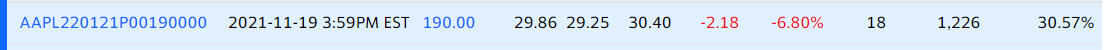

In [13]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.001441454784210328, 0.019197988009607255)

In [14]:
# Tasa de bonos de 1 yr de fecha 30/04/20 -> 0.16%
r = 0.0017/360 # Tasa diaria

In [15]:
from datetime import date
Hoy = date.today()
K = 190  # strike price
nscen = 100
dates = pd.date_range(start= Hoy, periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
sim_closes

,0,1,2,...,97,98,99
2021-11-23,161.672,161.088,163.759,...,155.058,166.880,162.977
2021-11-24,164.916,162.822,159.987,...,157.695,163.255,168.379
2021-11-25,169.166,164.074,159.948,...,155.310,160.222,163.960
2021-11-26,171.397,161.238,159.381,...,153.922,159.898,164.621
2021-11-27,172.803,157.630,156.828,...,150.867,165.319,164.951
...,...,...,...,...,...,...,...
2022-01-01,187.995,171.776,145.328,...,146.452,163.624,181.579
2022-01-02,182.626,172.407,141.955,...,144.464,162.003,181.943
2022-01-03,177.808,172.350,139.859,...,143.930,165.079,180.562
2022-01-04,174.661,167.136,139.262,...,143.634,166.103,177.592


In [16]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,97,98,99
2021-11-23,0.019,-0.025,-1.334e-02,...,-0.054,0.014,0.010
2021-11-24,0.008,-0.033,-1.598e-02,...,-0.050,-0.011,0.042
2021-11-25,0.035,-0.015,1.250e-04,...,-0.048,0.009,0.064
2021-11-26,0.050,-0.028,-1.135e-02,...,-0.080,0.016,0.054
2021-11-27,0.055,-0.036,-4.388e-03,...,-0.046,0.006,0.064
...,...,...,...,...,...,...,...
2022-01-01,0.110,-0.142,-1.062e-01,...,-0.119,0.175,0.111
2022-01-02,0.061,-0.122,-1.032e-01,...,-0.072,0.202,0.112
2022-01-03,0.066,-0.151,-8.299e-02,...,-0.057,0.239,0.111
2022-01-04,0.105,-0.148,-6.423e-02,...,-0.040,0.246,0.108


In [17]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,97,98,99
2021-11-23,164.577,157.357,159.272,...,152.884,163.666,163.012
2021-11-24,162.778,156.131,158.852,...,153.575,159.656,168.373
2021-11-25,167.083,159.065,161.430,...,153.831,162.857,172.143
2021-11-26,169.711,156.976,159.588,...,148.954,164.079,170.414
2021-11-27,170.457,155.682,160.703,...,154.229,162.393,172.045
...,...,...,...,...,...,...,...
2022-01-01,180.161,140.059,145.144,...,143.252,192.233,180.310
2022-01-02,171.644,142.923,145.579,...,150.185,197.609,180.457
2022-01-03,172.411,138.816,148.556,...,152.456,205.084,180.436
2022-01-04,179.255,139.184,151.368,...,155.116,206.366,179.905


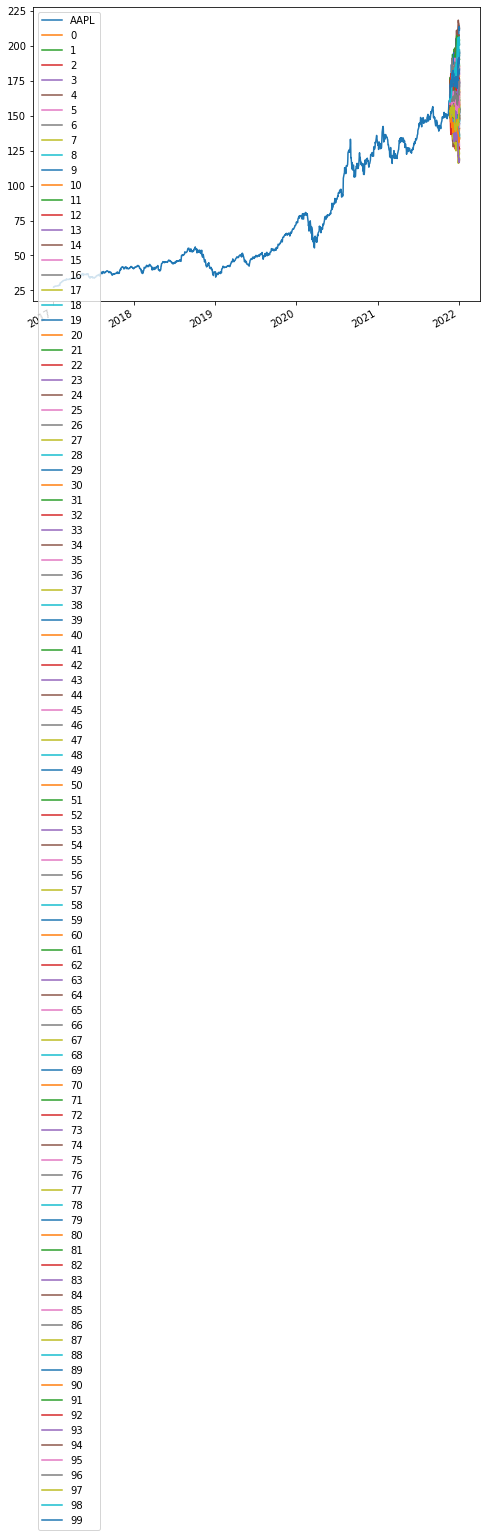

In [18]:
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [19]:
from datetime import date
Hoy = date.today()
K = 190  # strike price
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
sim_closes

,0,1,2,...,99997,99998,99999
2021-11-23,157.298,161.546,165.971,...,170.131,161.312,161.484
2021-11-24,158.529,161.672,167.840,...,168.544,156.855,156.938
2021-11-25,157.428,162.182,166.773,...,164.283,160.711,152.349
2021-11-26,154.986,158.706,166.985,...,160.717,157.377,148.808
2021-11-27,154.449,155.985,167.071,...,162.789,160.450,145.142
...,...,...,...,...,...,...,...
2022-01-01,139.888,156.435,178.771,...,153.321,158.121,142.755
2022-01-02,139.857,160.820,182.707,...,151.424,155.067,147.342
2022-01-03,135.879,155.659,178.737,...,154.770,156.067,144.118
2022-01-04,140.191,163.683,180.112,...,159.627,152.536,146.375


In [20]:
sim_closes.iloc[0, :] = closes_aapl.iloc[-1]
sim_closes

,0,1,2,...,99997,99998,99999
2021-11-23,NaN,NaN,NaN,...,NaN,NaN,NaN
2021-11-24,158.529,161.672,167.840,...,168.544,156.855,156.938
2021-11-25,157.428,162.182,166.773,...,164.283,160.711,152.349
2021-11-26,154.986,158.706,166.985,...,160.717,157.377,148.808
2021-11-27,154.449,155.985,167.071,...,162.789,160.450,145.142
...,...,...,...,...,...,...,...
2022-01-01,139.888,156.435,178.771,...,153.321,158.121,142.755
2022-01-02,139.857,160.820,182.707,...,151.424,155.067,147.342
2022-01-03,135.879,155.659,178.737,...,154.770,156.067,144.118
2022-01-04,140.191,163.683,180.112,...,159.627,152.536,146.375


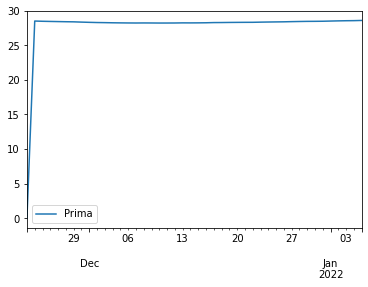

In [21]:
strike = 190
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes, 0).mean(axis=1)}, index=dates)
call.plot();

In [22]:
call.iloc[-1]

Prima    28.604
Name: 2022-01-05 00:00:00, dtype: float64

In [23]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(28.43485285687611, 28.773988685444724)
(28.43485609348859, 28.773985448832242)


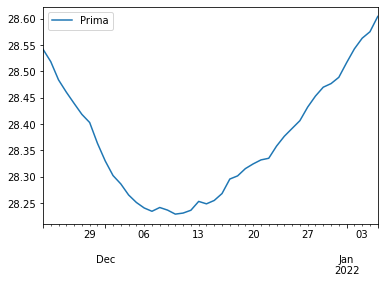

In [24]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [25]:
put.iloc[-1]

Prima    28.604
Name: 2022-01-05 00:00:00, dtype: float64

In [26]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(28.43485285687611, 28.773988685444724)
(28.43485285687611, 28.773988685444724)


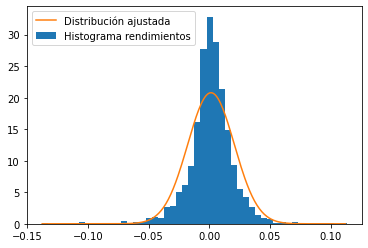

In [27]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()


In [28]:
ndays = 109 
nscen = 10

In [29]:
prob = y/np.sum(y)
values = x[1:]

In [30]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2021-11-23,0.003,0.003,0.023,...,-0.022,-0.022,-0.002
2021-11-24,0.013,-0.017,0.013,...,-0.012,-0.002,0.013
2021-11-25,-0.002,-0.002,0.008,...,-0.012,0.003,0.013
2021-11-26,0.003,0.003,0.003,...,-0.027,-0.017,0.008
2021-11-27,0.003,-0.002,-0.002,...,0.008,-0.002,0.008
...,...,...,...,...,...,...,...
2022-03-07,-0.017,-0.032,0.013,...,0.008,0.013,-0.002
2022-03-08,0.003,-0.047,-0.022,...,0.013,-0.042,0.018
2022-03-09,0.038,-0.012,-0.002,...,-0.002,-0.007,0.018
2022-03-10,-0.042,-0.002,-0.002,...,0.003,0.003,0.008


In [31]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2021-11-23,161.859,161.859,165.140,...,157.849,157.849,161.049
2021-11-24,163.946,159.084,167.269,...,155.923,157.496,163.125
2021-11-25,163.579,158.728,168.578,...,154.021,157.933,165.229
2021-11-26,164.034,159.169,169.047,...,149.869,155.226,166.521
2021-11-27,164.490,158.813,168.668,...,151.041,154.878,167.824
...,...,...,...,...,...,...,...
2022-03-07,208.590,186.791,300.857,...,299.352,198.383,223.769
2022-03-08,209.170,178.145,294.220,...,303.211,190.151,227.794
2022-03-09,217.250,175.971,293.561,...,302.533,188.776,231.892
2022-03-10,208.235,175.577,292.904,...,303.374,189.301,233.707


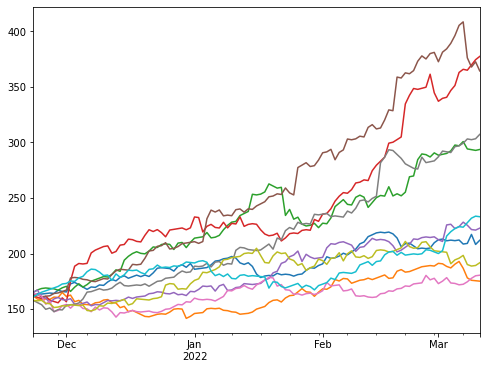

In [32]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

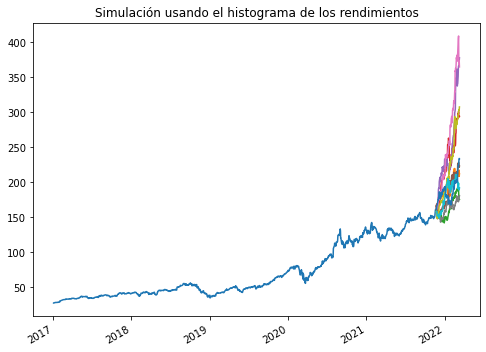

In [33]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [34]:
K=190
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

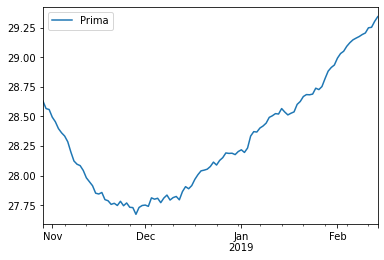

In [35]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [36]:
put_hist.iloc[-1]

Prima    29.342
Name: 2019-02-14 00:00:00, dtype: float64

In [37]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(28.68852137844917, 29.995573475030245)
(28.68852137844917, 29.995573475030245)


Black Scholes

In [38]:
np.exp

<ufunc 'exp'>

In [39]:
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))

def bs_put(S,K,T,r,sigma):
    return K*np.exp(-r*T)-S+bs_call(S,K,T,r,sigma)

In [40]:
stock = 'AAPL'
expiry = '01-21-2022'
strike_price = 190

today = datetime.now()
one_year_ago = today.replace(year=today.year-1)

df = web.DataReader(stock, 'yahoo', one_year_ago, today)

df = df.sort_values(by="Date")
df = df.dropna()
df = df.assign(close_day_before=df.Close.shift(1))
df['returns'] = ((df.Close - df.close_day_before)/df.close_day_before)

sigma = np.sqrt(252) * df['returns'].std()
uty = (web.DataReader(
    "^TNX", 'yahoo', today.replace(day=today.day-1), today)['Close'].iloc[-1])/100
lcp = df['Close'].iloc[-1]
t = (datetime.strptime(expiry, "%m-%d-%Y") - datetime.utcnow()).days / 365

print('El precio de la opcción es: ', bs_put(lcp, strike_price, t, uty, sigma))

El precio de la opcción es:  28.4611867069421


Comparando el método vemos que nos arroja BS = 29.33
Mientras que los anteriores = 30.288 y 29.199
Lo cual vemos que todos los métodos dan aproximaciones bastante buenas 
Ya que el real osila en este rango tambien 

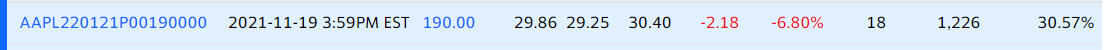

# Código Jose

In [41]:
# Código Jose
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

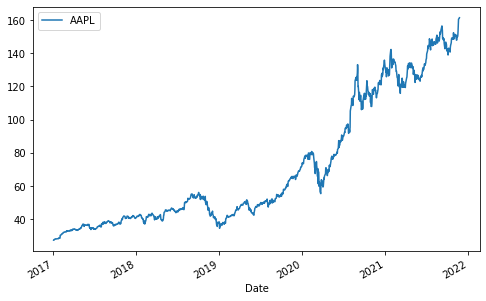

In [42]:
ticker = ['AAPL']
start_date = '2017-01-01'
closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [43]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

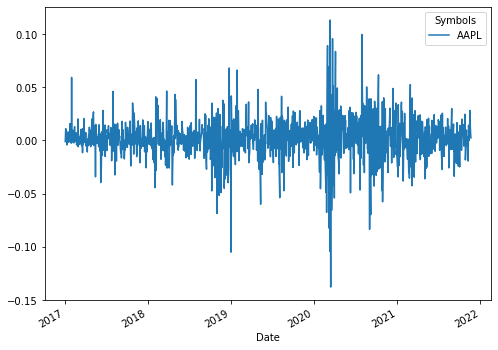

In [44]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [45]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2021-11-17,0.016
2021-11-18,0.029
2021-11-19,0.017


In [46]:
today = pd.Timestamp(date.today())
expiry = '2022-01-21'

nscen = 10000
dates = pd.date_range(start=today, end=expiry, freq='B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06', '2021-12-07', '2021-12-08',
                '2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14',
                '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
                '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
                '2021-12-27', '2021-12-28', '2021-12-29', '2021-12-30',
                '2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
                '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
                '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-17',
                '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21'],
               dtype='datetime64[ns]', freq='B'),
 44)

In [47]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,9997,9998,9999
2021-11-23,-9.199e-03,-4.410e-04,1.254e-02,...,3.970e-02,5.180e-04,2.406e-02
2021-11-24,-2.205e-04,-1.540e-05,2.586e-05,...,2.888e-04,5.125e-06,5.262e-05
2021-11-25,6.038e-06,-4.367e-07,3.883e-07,...,2.941e-06,-7.338e-08,1.108e-06
2021-11-26,-2.166e-07,-1.625e-09,-6.645e-09,...,1.032e-08,-2.942e-09,-1.255e-08
2021-11-29,4.220e-09,9.775e-12,-1.230e-11,...,6.673e-11,8.412e-11,8.007e-11
...,...,...,...,...,...,...,...
2022-01-17,7.420e-78,9.850e-83,3.953e-84,...,1.215e-78,1.241e-82,-3.343e-80
2022-01-18,4.523e-81,7.023e-85,-3.246e-86,...,-2.087e-80,-2.077e-84,6.514e-82
2022-01-19,3.094e-83,-7.016e-87,-9.363e-88,...,2.992e-82,-1.020e-85,-8.303e-84
2022-01-20,-4.381e-85,1.226e-88,1.384e-90,...,-7.977e-84,1.769e-87,2.061e-85


In [48]:
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

In [49]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

0.15751392654526314

In [50]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0014414547842103284, 0.01919798767318258)

In [51]:
# Tasa de bonos de 1 yr de fecha 30/04/20 -> 0.16%
r = 0.0017/360 # Tasa diaria

In [52]:
from datetime import date
Hoy = date.today()
K = 190  # strike price
nscen = 100
dates = pd.date_range(start= Hoy, periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
sim_closes

,0,1,2,...,97,98,99
2021-11-23,161.182,162.672,164.276,...,163.466,166.584,163.277
2021-11-24,162.031,159.939,167.355,...,165.488,164.465,160.884
2021-11-25,162.202,164.622,162.300,...,164.750,164.547,159.644
2021-11-26,163.969,165.874,163.461,...,161.188,165.708,160.956
2021-11-27,170.540,167.406,163.508,...,162.144,168.292,156.435
...,...,...,...,...,...,...,...
2022-01-01,156.290,134.778,167.939,...,169.798,134.698,151.700
2022-01-02,156.526,135.333,168.224,...,161.886,133.354,155.298
2022-01-03,156.527,137.728,168.701,...,160.408,136.780,151.195
2022-01-04,153.848,139.643,169.850,...,160.537,141.226,151.265


In [53]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,97,98,99
2021-11-23,-0.014,-0.024,0.005,...,0.018,0.013,0.009
2021-11-24,-0.029,-0.038,-0.010,...,0.021,0.010,0.024
2021-11-25,-0.026,-0.080,0.043,...,-0.028,0.042,0.019
2021-11-26,-0.015,-0.082,0.057,...,-0.034,0.069,0.027
2021-11-27,-0.009,-0.068,0.024,...,-0.038,0.063,0.021
...,...,...,...,...,...,...,...
2022-01-01,-0.149,-0.288,0.180,...,-0.007,-0.003,0.026
2022-01-02,-0.169,-0.286,0.151,...,-0.052,0.013,0.035
2022-01-03,-0.191,-0.239,0.143,...,-0.056,0.009,0.039
2022-01-04,-0.204,-0.259,0.183,...,-0.099,0.014,0.066


In [54]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,97,98,99
2021-11-23,159.102,157.512,162.195,...,164.417,163.463,162.855
2021-11-24,156.723,155.383,159.791,...,164.885,163.073,165.396
2021-11-25,157.294,149.060,168.430,...,157.025,168.260,164.536
2021-11-26,158.962,148.777,170.917,...,155.970,172.989,165.854
2021-11-27,160.041,150.846,165.386,...,155.427,171.982,164.785
...,...,...,...,...,...,...,...
2022-01-01,139.118,120.979,193.170,...,160.310,160.892,165.723
2022-01-02,136.343,121.316,187.712,...,153.281,163.490,167.186
2022-01-03,133.346,127.052,186.167,...,152.585,162.789,167.802
2022-01-04,131.679,124.573,193.803,...,146.235,163.655,172.464


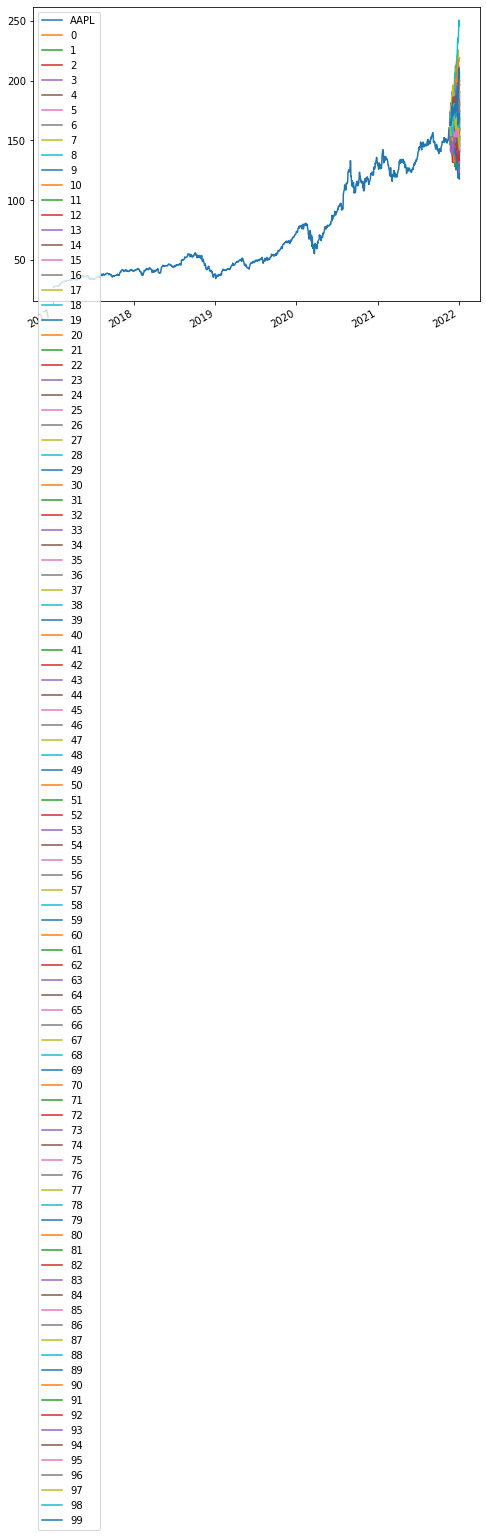

In [55]:
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [56]:
from datetime import date
Hoy = date.today()
K = 190  # strike price
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);
sim_closes

,0,1,2,...,99997,99998,99999
2021-11-23,162.104,167.217,161.964,...,162.951,160.656,157.927
2021-11-24,161.207,167.026,155.957,...,162.193,165.697,159.375
2021-11-25,160.777,162.672,156.924,...,163.259,167.853,158.724
2021-11-26,162.915,161.553,157.957,...,164.886,162.886,159.825
2021-11-27,167.102,159.345,156.266,...,163.277,166.693,157.675
...,...,...,...,...,...,...,...
2022-01-01,148.195,136.045,159.780,...,154.028,178.690,145.125
2022-01-02,148.374,134.073,153.160,...,158.084,176.682,153.061
2022-01-03,148.870,134.885,151.792,...,153.004,174.856,152.921
2022-01-04,148.482,131.816,152.758,...,156.966,174.831,152.176


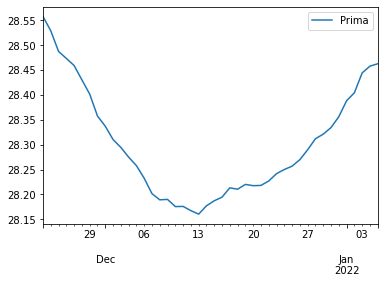

In [57]:
strike = 190
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes, 0).mean(axis=1)}, index=dates)
put.plot();

In [58]:
put.iloc[-1]

Prima    28.462
Name: 2022-01-05 00:00:00, dtype: float64

In [59]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(28.292858399645116, 28.63164207767358)
(28.292861632896777, 28.631638844421918)


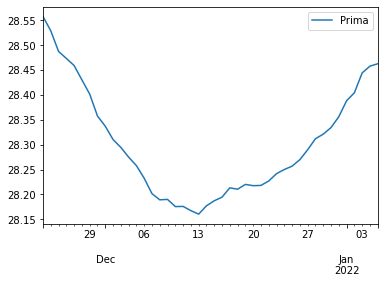

In [60]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [61]:
put.iloc[-1]

Prima    28.462
Name: 2022-01-05 00:00:00, dtype: float64

In [62]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(28.292858399645116, 28.63164207767358)
(28.292861632896777, 28.631638844421918)


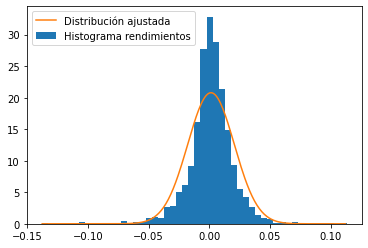

In [63]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

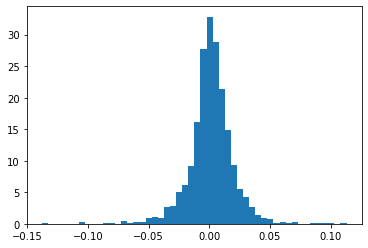

In [64]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

dof,mu_fit,sd_fit = st.t.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen,df=dof,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

In [ ]:
st.probplot(ren['AAPL'],sparams= dof, dist='t', plot=plt);

In [ ]:
K=190
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

In [ ]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [ ]:
put_hist.iloc[-1]

In [ ]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

In [ ]:
np.exp

In [ ]:
def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))

def bs_put(S,K,T,r,sigma):
    return K*np.exp(-r*T)-S+bs_call(S,K,T,r,sigma)

In [ ]:
stock = 'AAPL'
expiry = '01-21-2022'
strike_price = 190

today = datetime.now()
one_year_ago = today.replace(year=today.year-1)

df = web.DataReader(stock, 'yahoo', one_year_ago, today)

df = df.sort_values(by="Date")
df = df.dropna()
df = df.assign(close_day_before=df.Close.shift(1))
df['returns'] = ((df.Close - df.close_day_before)/df.close_day_before)

sigma = np.sqrt(252) * df['returns'].std()
uty = (web.DataReader(
    "^TNX", 'yahoo', today.replace(day=today.day-1), today)['Close'].iloc[-1])/100
lcp = df['Close'].iloc[-1]
t = (datetime.strptime(expiry, "%m-%d-%Y") - datetime.utcnow()).days / 365

print('El precio de la opcción es: ', bs_put(lcp, strike_price, t, uty, sigma))